In [1]:
%load_ext autoreload
%autoreload 2 

In [6]:
# If on colab
!git clone https://github.com/ieee8023/latentshift
!pip install -q -r latentshift/requirements.txt

In [8]:
import io
import os,sys
sys.path.insert(0,"latentshift")

import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import classifiers
import autoencoders
import taming


In [3]:
# This is needed until the library is merged into captum
# !pip uninstall captum -y 
!git clone https://github.com/ieee8023/captum

In [3]:
sys.path.insert(0,"captum")
import captum

In [4]:
ae = autoencoders.VQGAN(weights="faceshq", download=True)
model = classifiers.FaceAttribute(download=True)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


/usr/local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.


In [9]:
x = PIL.Image.open("latentshift/sample_images/101.jpg").convert('RGB') 
x = torchvision.transforms.ToTensor()(x)[None,...]

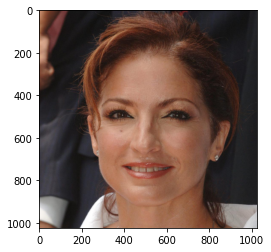

In [10]:
plt.imshow(x[0].permute(1, 2, 0).detach().numpy());

In [11]:
if torch.cuda.is_available():
    model = model.cuda()
    ae = ae.cuda()
    x = x.cuda()

In [12]:
model.targets

['blurry',
 'sideburns',
 'wearing_earrings',
 'bald',
 'goatee',
 'mustache',
 '5_o_clock_shadow',
 'arched_eyebrows',
 'no_beard',
 'heavy_makeup',
 'male',
 'wearing_lipstick',
 'black_hair',
 'high_cheekbones',
 'smiling',
 'mouth_slightly_open',
 'oval_face',
 'bushy_eyebrows',
 'attractive',
 'young',
 'gray_hair',
 'brown_hair',
 'blond_hair',
 'pale_skin',
 'chubby',
 'double_chin',
 'big_nose',
 'bags_under_eyes',
 'wearing_necklace',
 'wearing_necktie',
 'rosy_cheeks',
 'bangs',
 'wavy_hair',
 'straight_hair',
 'wearing_hat',
 'big_lips',
 'narrow_eyes',
 'pointy_nose',
 'receding_hairline',
 'eyeglasses']

In [13]:
target = model.targets.index("smiling")

Shift: 0 , Prediction: [0.92719966]
Shift: -10.0 , Prediction: [0.8869895]
Shift: -21.0 , Prediction: [0.8257774]
Shift: -34.0 , Prediction: [0.7341991]
Shift: -48.0 , Prediction: [0.58927655]
Shift: -63.0 , Prediction: [0.40849403]
Shift: -80.0 , Prediction: [0.2409919]
Shift: -98.0 , Prediction: [0.14709306]
Shift: -118.0 , Prediction: [0.09566681]
Selected bounds:  -118.0 0
Shift: -106.2 , Prediction: [0.12366042]
Shift: -94.4 , Prediction: [0.15986332]
Shift: -82.60000000000001 , Prediction: [0.22004652]
Shift: -70.80000000000001 , Prediction: [0.32372433]
Shift: -59.000000000000014 , Prediction: [0.45405293]
Shift: -47.20000000000002 , Prediction: [0.5986762]
Shift: -35.40000000000002 , Prediction: [0.72307]
Shift: -23.600000000000023 , Prediction: [0.80777097]
Shift: -11.800000000000026 , Prediction: [0.8779259]


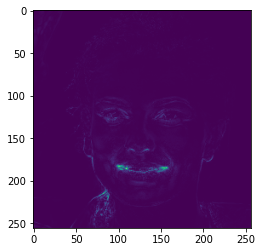

In [14]:
attr = captum.attr.LatentShift(model, ae)
output = attr.attribute(x, target=target)
plt.imshow(output['heatmap']);

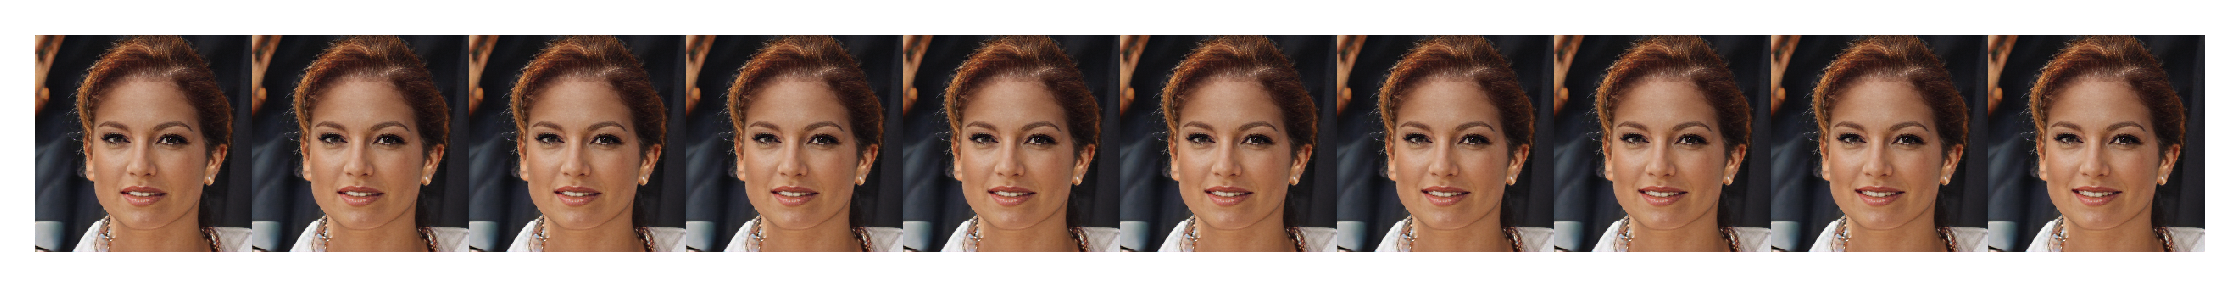

In [15]:
images_f = [h.transpose(0, 2, 3, 1) for h in output["generated_images"]]
dimgs = np.concatenate(images_f)
fig, ax = plt.subplots(1,1, figsize=(8,3), dpi=350)
plt.imshow(np.concatenate(dimgs,1), interpolation='none');
plt.axis('off');

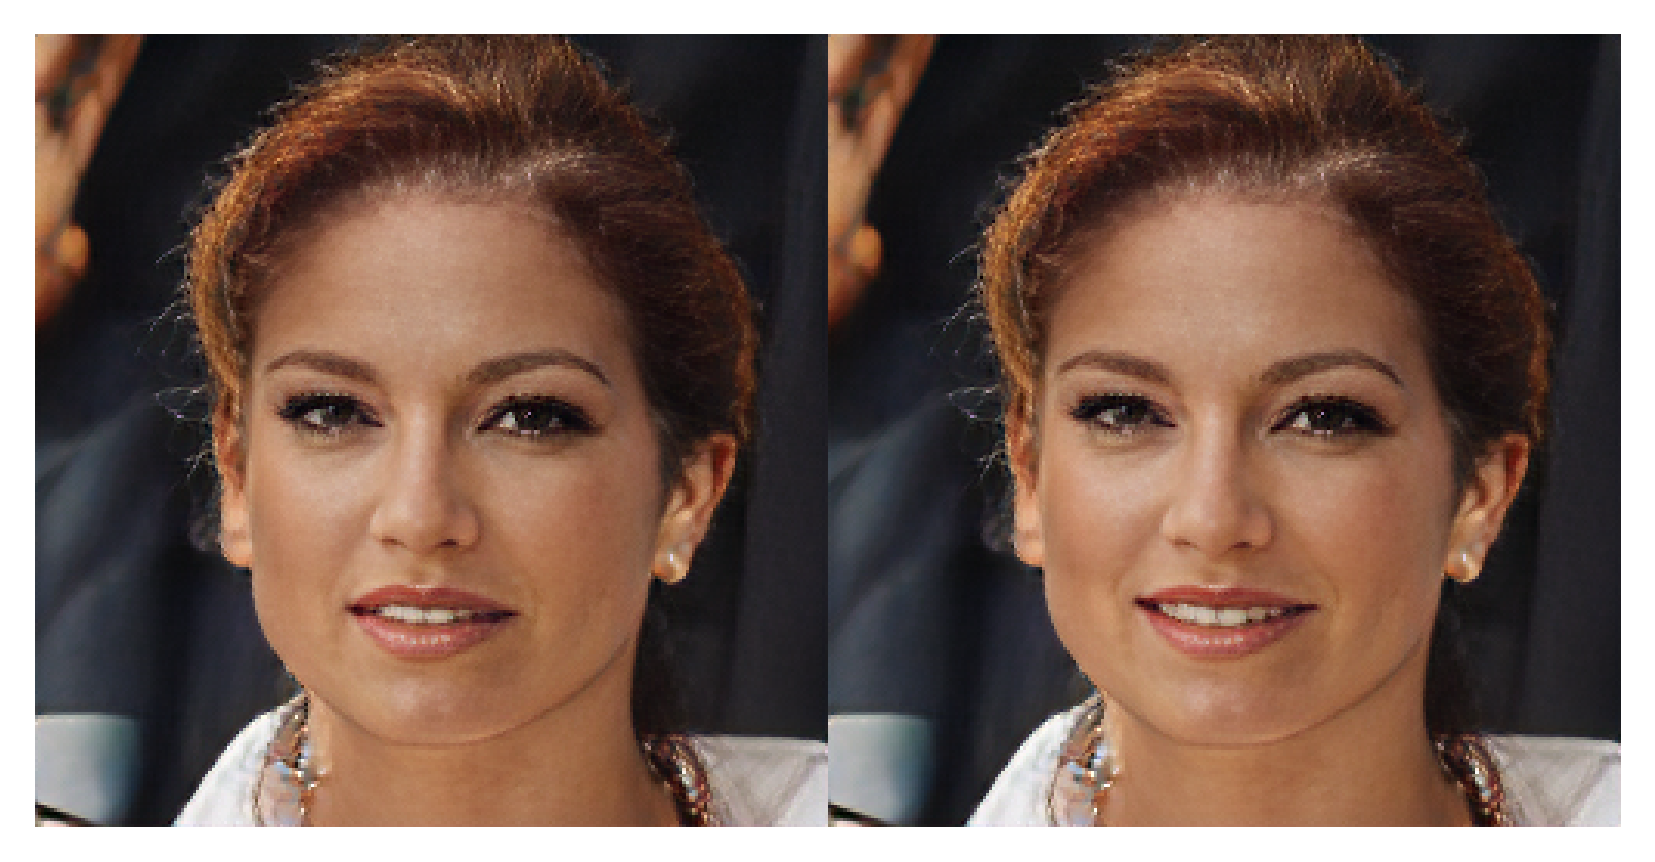

In [16]:
dimgs = np.concatenate([images_f[0], images_f[-1]])
fig, ax = plt.subplots(1,1, figsize=(8,3), dpi=350)
plt.imshow(np.concatenate(dimgs,1), interpolation='none');
plt.axis('off');

In [17]:
attr.generate_video(output, "test")

ffmpeg -loglevel quiet -stats -y -i /tmp/gifsplanation/image-%d.png -c:v libx264 -vf scale=-2:256 -profile:v baseline -level 3.0 -pix_fmt yuv420p 'test.mp4'
b''


frame=   20 fps=0.0 q=-1.0 Lsize=      15kB time=00:00:00.76 bitrate= 156.6kbits/s speed=12.6x    
